**Packages Import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Dateset Import**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

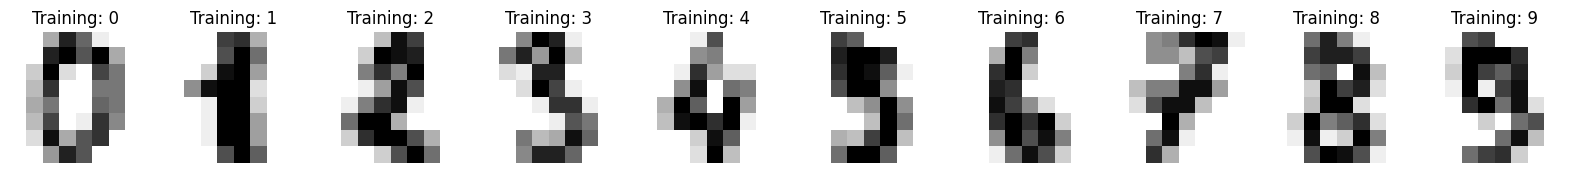

In [ ]:
_, axes = plt.subplots(nrows=1,ncols=10,figsize=(20,3))
for ax, image, label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title('Training: %i' %label)

**Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data.shape

(1797, 64)

**Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtr,xts,ytr,yts = train_test_split(data,df.target,test_size=0.3)

In [ ]:
xtr.shape,xts.shape,ytr.shape,yts.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(xtr,ytr)

RandomForestClassifier()

**Predict Test Data**

In [ ]:
y_pre1 = rf.predict(xts)

In [ ]:
y_pre1

array([4, 0, 6, 8, 5, 8, 2, 2, 2, 1, 0, 6, 9, 9, 2, 0, 3, 1, 0, 8, 0, 0,
       2, 6, 1, 2, 5, 8, 5, 2, 0, 9, 7, 0, 2, 6, 1, 2, 1, 5, 3, 3, 1, 9,
       7, 9, 8, 7, 8, 3, 4, 7, 6, 3, 1, 8, 0, 0, 6, 6, 7, 1, 6, 0, 9, 4,
       2, 5, 1, 7, 3, 6, 0, 7, 6, 4, 8, 4, 1, 9, 5, 4, 5, 3, 0, 7, 9, 0,
       2, 8, 3, 3, 1, 0, 0, 1, 2, 6, 4, 2, 7, 0, 4, 3, 0, 7, 9, 2, 9, 8,
       6, 0, 3, 5, 9, 1, 3, 1, 9, 7, 3, 4, 8, 5, 2, 4, 7, 2, 8, 5, 7, 4,
       7, 0, 5, 2, 5, 7, 1, 2, 1, 7, 4, 4, 1, 1, 0, 8, 5, 2, 7, 7, 7, 7,
       8, 6, 1, 4, 7, 8, 7, 0, 9, 4, 2, 7, 1, 5, 7, 3, 6, 8, 3, 0, 8, 7,
       8, 7, 7, 7, 9, 8, 7, 5, 8, 6, 9, 2, 7, 0, 0, 2, 8, 3, 5, 3, 7, 7,
       2, 7, 4, 3, 9, 0, 6, 7, 5, 3, 3, 4, 9, 5, 9, 3, 9, 8, 1, 6, 6, 6,
       5, 1, 9, 6, 5, 8, 0, 0, 3, 1, 0, 7, 0, 7, 7, 8, 7, 3, 1, 5, 6, 4,
       3, 5, 7, 9, 6, 1, 4, 4, 0, 3, 6, 4, 9, 0, 3, 9, 9, 1, 9, 4, 6, 7,
       6, 9, 6, 5, 0, 2, 3, 6, 2, 9, 0, 4, 1, 7, 6, 9, 4, 3, 9, 8, 1, 9,
       6, 7, 7, 5, 4, 3, 1, 4, 3, 3, 9, 5, 8, 1, 1,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yts,y_pre1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.98      1.00      0.99        49
           2       1.00      0.98      0.99        51
           3       0.95      0.95      0.95        56
           4       0.98      1.00      0.99        51
           5       1.00      0.97      0.98        58
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        62
           8       0.90      0.92      0.91        48
           9       0.93      0.92      0.92        60

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

